# Clustering using the k-Means Clustering Algorithm

| Key              | Value                                                                                                                                                                                                                                                                                                        |
|:-----------------|:-------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------|
| **Course Codes** | BBT 4206 and BFS 4102                                                                                                                                                                                                                                                                                        |
| **Course Names** | BBT 4206: Business Intelligence II (Week 1-3 of 13) and<br/>BFS 4102: Advanced Business Data Analytics (Week 4-6 of 13)                                                                                                                                                                                      |
| **Semester**     | January to April 2026                                                                                                                                                                                                                                                                                      |
| **Lecturer**     | Allan Omondi                                                                                                                                                                                                                                                                                                 |
| **Contact**      | aomondi@strathmore.edu                                                                                                                                                                                                                                                                                       |
| **Note**         | The lecture contains both theory and practice.<br/>This notebook forms part of the practice.<br/>It is intended for educational purposes only.<br/>Recommended citation: [BibTex](https://raw.githubusercontent.com/course-files/ClusteringandAssociationRuleMining/refs/heads/main/RecommendedCitation.bib) |

**Business context**: A business aims to refine its marketing strategy by grouping customers into distinct segments based on _demographic details_ and _spending behavior_. This segmentation strategy serves as a foundation for implementing highly personalized marketing campaigns, where the leading KPI is the _customer engagement with tailored adverts_, and the lagging KPI is the _increase in overall customer spending_. By identifying specific customer clusters, the marketing team can optimize advertising efforts to target each group more effectively, ultimately driving increased customer satisfaction and revenue.

**Dataset**: The dataset used is based on the **"Mall Customers"** dataset, which consists of 200 observations. Each observation represents a customer, and the dataset includes demographic and behavioral features that are essential for customer segmentation.

| **Feature Type** | **Feature Name**         | **Description**                                                                              |
|:-----------------|:-------------------------|:---------------------------------------------------------------------------------------------|
| **Feature**      | `CustomerID`             | A unique identifier assigned to each customer                                                |
| **Feature**      | `Gender`                 | Gender of the customer (Male or Female)                                                      |
| **Feature**      | `Age`                    | Age of the customer in years                                                                 |
| **Feature**      | `Annual Income (k$)`     | Annual income of the customer in thousands of dollars                                        |
| **Feature**      | `Spending Score (1-100)` | Spending behavior of the customer on a scale of 1 to 100, with 100 being the highest spender |

Suppose that the dataset has been provided by the organization's customer service department for clustering purposes. This is done to segment customers into distinct groups based on their demographics (`Age`, `Gender`) and spending behaviors (`Annual Income`, `Spending Score`).


**Remote Environments:**

Do your best to setup your local environment as guided during the lab, however, if you have challenges setting it up, then you can use the following remote environments temporarily for the lab:<br/>

[![Colab](https://img.shields.io/badge/Open-Colab-orange?logo=googlecolab)](
https://colab.research.google.com/github/course-files/ClusteringandAssociationRuleMining/blob/main/6_kmeans_clustering.ipynb) (preferred option)

[![Codespaces](https://img.shields.io/badge/Open-Codespaces-blue?logo=github)](
https://github.com/codespaces/new/course-files/ClusteringandAssociationRuleMining) (alternative)

## Step 1: Install Dependencies and Import Required Libraries

Confirm the following:
1. Which Python interpreter will be used to execute new code and where it is located
2. The Python version

Then install all the packages into the Jupyter notebook's virtual environment before importing them.

In [55]:
import sys
sys.executable

'c:\\Users\\aomondi\\Documents\\GitHub\\Teaching\\ClusteringandAssociationRuleMining\\.venv\\Scripts\\python.exe'

In [56]:
!python --version

Python 3.13.11


### Set the Environment Variables - Option 1 (Using Python)

In [57]:
%pip install python-dotenv

Note: you may need to restart the kernel to use updated packages.


In [58]:
import sys
import os
from dotenv import load_dotenv

# This loads .env from current or parent directories if present
# For a classroom setup, `override=True` ensures .env values take precedence
# over any existing environment variables
load_dotenv(override=True)

def resolve_environment():
    if os.environ.get("ENVIRONMENT"):
        return os.environ["ENVIRONMENT"].upper()

    # Automatic detection if running in Google Colab
    if "google.colab" in sys.modules:
        return "COLAB"

    # Defaults to a 'DEV' environment
    return "DEV"

ENV_SETUP = resolve_environment()

VALID_ENVIRONMENTS = {"PROD", "STAGING", "TESTING", "COLAB", "DEV"}

if ENV_SETUP not in VALID_ENVIRONMENTS:
    print(f"Warning: Invalid ENVIRONMENT '{ENV_SETUP}'. Defaulting to 'DEV'.")
    ENV_SETUP = "DEV"
print(f"Dependencies will be installed for a '{ENV_SETUP}' environment.")

Dependencies will be installed for a 'DEV' environment.


In [59]:
import subprocess

def silent_pip_install(cmd):
    result = subprocess.run(cmd, shell=True, stdout=subprocess.PIPE, stderr=subprocess.PIPE)
    if result.returncode != 0:
        print(result.stderr.decode())

if ENV_SETUP == "PROD":
    silent_pip_install("pip install -r " \
    "https://raw.githubusercontent.com/course-files/ClusteringandAssociationRuleMining//refs/heads/main/requirements/prod.txt")
    print(f"Completed installation of environment dependencies for '{ENV_SETUP}'.")

elif ENV_SETUP in {"STAGING"}:
    silent_pip_install("pip install -r " \
    "https://raw.githubusercontent.com/course-files/ClusteringandAssociationRuleMining//refs/heads/main/requirements/dev.txt " \
    "-c https://raw.githubusercontent.com/course-files/ClusteringandAssociationRuleMining//refs/heads/main/requirements/constraints.txt")
    print(f"Completed installation of environment dependencies for '{ENV_SETUP}'.")

elif ENV_SETUP in {"TESTING"}:
    silent_pip_install("pip install -r " \
    "https://raw.githubusercontent.com/course-files/ClusteringandAssociationRuleMining//refs/heads/main/requirements/dev.txt " \
    "-c https://raw.githubusercontent.com/course-files/ClusteringandAssociationRuleMining//refs/heads/main/requirements/constraints.txt")
    print(f"Completed installation of environment dependencies for '{ENV_SETUP}'.")

elif ENV_SETUP in {"COLAB"}:
    silent_pip_install("pip install -r " \
    "https://raw.githubusercontent.com/course-files/ClusteringandAssociationRuleMining//refs/heads/main/requirements/colab.txt")
    print(f"Completed installation of environment dependencies for '{ENV_SETUP}'.")

elif ENV_SETUP in {"DEV"}:
    silent_pip_install("pip install -r " \
    "https://raw.githubusercontent.com/course-files/ClusteringandAssociationRuleMining//refs/heads/main/requirements/dev.txt " \
    "-c https://raw.githubusercontent.com/course-files/ClusteringandAssociationRuleMining//refs/heads/main/requirements/constraints.txt")
    print(f"Completed installation of environment dependencies for '{ENV_SETUP}'.")

Completed installation of environment dependencies for 'DEV'.


### Set the Environment Variables - Option 2 (Manually)

Set the environment by executing one of the following depending on your OS and shell:

For Linux/MacOS Terminal (bash, zsh):
```shell
export ENVIRONMENT=DEV
echo $ENVIRONMENT
```

For Windows Git Bash Terminal:
```shell
export ENVIRONMENT=DEV
echo $ENVIRONMENT
```

For Windows CMD:

```shell
set ENVIRONMENT=DEV
echo %ENVIRONMENT%
```

For Windows PowerShell:
```shell
$env:ENVIRONMENT="DEV"
$env:ENVIRONMENT
```

`import pandas as pd`
- 'Pandas' is essential because it is used for:
    - Loading the CSV data (`pd.read_csv()`)
    - Data manipulation and analysis
    - Creating and managing DataFrames
    - Essential for structured data analysis, e.g., `Group By` operations

`import matplotlib.pyplot as plt`
- 'Matplotlib' is used for:
    - Visualising data
    - Plotting graphs (e.g., scatter plots, line plots, the elbow method graph)
    - Customising visualisations (labels, titles, legends)

`from sklearn.preprocessing import StandardScaler, MinMaxScaler`
- 'StandardScaler' is used for:
    - Scaling features to have a mean of 0 and standard deviation of 1
    - This **data transformation** (referred to as standardization) is necessary to ensure that all features contribute equally to the distance calculations when clustering
- 'MinMaxScaler' is used for:
    - Normalization to ensure numeric features range between 0 and 1
- One-Hot encoding is another data transformation technique that converts categorical variables into binary vectors. It is not applied in this lab

`from sklearn.cluster import KMeans`
- 'KMeans' is used for:
    - Performing K-Means clustering
    - Finding clusters in the data based on the features provided
    - The `fit_predict()` method can then be used to fit the model and predict cluster labels for each data point

`import seaborn as sns`
- 'Seaborn' is used for:
    - Enhanced data visualisation
    - Creating more aesthetically pleasing and informative plots (e.g., histograms, box plots, heatmaps)
    - It provides a high-level interface for drawing attractive statistical graphics

`import warnings`
`warnings.filterwarnings('ignore')`
- 'Warnings' is used to suppress warnings that may arise during the execution of the code, such as convergence warnings from K-Means. Even though it is not necessary for the clustering, it helps keep the output clean and focused on the results.

In [60]:
# For file and system operations
import urllib.request
import os

# For data manipulation
import pandas as pd
import numpy as np

# For statistical data analysis
from scipy.stats import kurtosis
from scipy.stats import skew

# For data preprocessing and transformation
from sklearn.preprocessing import StandardScaler
# from sklearn.preprocessing import MinMaxScaler

# For Machine Learning
from sklearn.cluster import KMeans

# For data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# For model persistence
import joblib

# For suppressing warnings
import warnings
warnings.filterwarnings('ignore')

## Step 2: Load the data

In [61]:
dataset_path = './data/mall_customers.csv'
url = 'https://raw.githubusercontent.com/course-files/ClusteringandAssociationRuleMining/refs/heads/main/data/mall_customers.csv'

if not os.path.exists(dataset_path):
    print("Downloading dataset...")
    if not os.path.exists('./data'):
        os.makedirs('./data')
    urllib.request.urlretrieve(url, dataset_path)
    print("✅ Dataset downloaded")
else:
    print("✅ Dataset already exists locally")

use_cols = ['CustomerID', 'Gender', 'Age', 'Annual Income (k$)', 'Spending Score (1-100)']
customer_data = pd.read_csv(dataset_path, usecols=use_cols, encoding='utf-8', nrows=200000)

✅ Dataset already exists locally


### Identify the numeric and categorical columns

**Selection of numeric columns**
- The code identifies columns with numeric data types (`int64` and `float64`) that can be subjected to mathematical or statistical functions.
- The code also identifies non-numeric columns (e.g., `strings`, `objects`, etc.) by excluding numeric (`int64`, `float64`) and `datetime` data types.
- This is done using `select_dtypes()` method of the DataFrame, which filters columns based on their data types.

In [62]:
# Ensure 'renew' is treated as categorical
# customer_data['Gender'] = customer_data['Gender'].astype('category')

customer_data['Gender'] = pd.Categorical(
    customer_data['Gender'], 
    categories=['Male', 'Female'],
    ordered=False
)

numeric_cols = customer_data.select_dtypes(include=['int64', 'float64']).columns
categorical_cols = customer_data.select_dtypes(exclude=['int64', 'float64', 'datetime64[ns]']).columns

print("\nThe identified numeric columns are:")
print(numeric_cols.tolist())

print("\nThe identified categorical columns is/are:")
print(categorical_cols.tolist())


The identified numeric columns are:
['CustomerID', 'Age', 'Annual Income (k$)', 'Spending Score (1-100)']

The identified categorical columns is/are:
['Gender']


## Step 3: Initial Exploratory Data Analysis (EDA)

In [63]:
print("\n*1* The number of observations and variables")
display(customer_data.shape)

print("\n*2* The data types:")
display(customer_data.info())

print("\n*3* The summary of the numeric columns:")
display(customer_data.describe())

print("\n*4* The whole dataset:")
display(customer_data)

print("\n*5* The first 5 rows in the dataset:")
display(customer_data.head())

print("\n*6* The last 5 rows in the dataset:")
display(customer_data.tail())

print("\n*7* Percentage distribution for each category")
print("\nNumber of observations per class:")
print("Frequency counts:\n", customer_data['Gender'].value_counts())
print("\nPercentages:\n", customer_data['Gender'].value_counts(normalize=True) * 100, "%")


*1* The number of observations and variables


(200, 5)


*2* The data types:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype   
---  ------                  --------------  -----   
 0   CustomerID              200 non-null    int64   
 1   Gender                  200 non-null    category
 2   Age                     200 non-null    int64   
 3   Annual Income (k$)      200 non-null    int64   
 4   Spending Score (1-100)  200 non-null    int64   
dtypes: category(1), int64(4)
memory usage: 6.7 KB


None


*3* The summary of the numeric columns:


,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000



*4* The whole dataset:


,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18



*5* The first 5 rows in the dataset:


,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40



*6* The last 5 rows in the dataset:


,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18
199,200,Male,30,137,83



*7* Percentage distribution for each category

Number of observations per class:
Frequency counts:
 Gender
Female    112
Male       88
Name: count, dtype: int64

Percentages:
 Gender
Female    56.0
Male      44.0
Name: proportion, dtype: float64 %


### Measures of Distribution

#### Variance of numeric columns

In [64]:
print("\nVariance of numeric columns:")
print(customer_data[numeric_cols].var())


Variance of numeric columns:
CustomerID                3350.000000
Age                        195.133166
Annual Income (k$)         689.835578
Spending Score (1-100)     666.854271
dtype: float64


#### Standard deviation of numeric columns

In [65]:
print("\nStandard deviation of numeric columns:")
print(customer_data[numeric_cols].std())


Standard deviation of numeric columns:
CustomerID                57.879185
Age                       13.969007
Annual Income (k$)        26.264721
Spending Score (1-100)    25.823522
dtype: float64


#### Kurtosis (Pearson) of numeric columns

The Kurtosis informs us of how often outliers occur in the results. There are different formulas for calculating kurtosis. Specifying `fisher=False` allows us to use the same kurtosis formula used in other statistical software like SPSS and SAS. It is referred to as "Pearson's definition of kurtosis".

Interpretation of Pearson's definition of kurtosis:

1. Kurtosis < 3 implies a low number of outliers → platykurtic
2. Kurtosis = 3 implies a medium number of outliers → mesokurtic
3. Kurtosis > 3 implies a high number of outliers → leptokurtic

High kurtosis (leptokurtic) affects models that are sensitive to outliers. Estimates of the variance are also inflated. Low kurtosis (platykurtic) implies a possible underestimation of real-world variability. The typical remedy includes trimming outliers or using robust statistical methods that are less affected by outliers.

In [66]:
# .agg(...) = Enables us to aggregate (summarize) columns using some function
# axis=0 = Tells Python to perform the calculation down each column (not across rows)
# Lambda creates a mini-function without giving it a name.

# We would do this without lambda (the long way):

# def calculate_kurtosis(x):
#     return kurtosis(x, fisher=False)

# print(customer_data[numeric_cols].agg(calculate_kurtosis, axis=0))

# print(customer_data[numeric_cols].agg(lambda x: kurtosis(x, fisher=False), axis=0))
# or
print(customer_data[numeric_cols].apply(lambda x: float(kurtosis(x, fisher=False))))

CustomerID                1.799940
Age                       2.315249
Annual Income (k$)        2.874107
Spending Score (1-100)    2.164042
dtype: float64


#### Skewness of numeric columns

The skewness is used to identify the asymmetry of the distribution of results. Similar to kurtosis, there are several ways of computing the skewness.

The skewness test results are interpreted as:

1. Skewness between -0.4 and 0.4 (inclusive) implies that there is no skew in the distribution of results; the distribution of results is symmetrical; it is a normal distribution; a Gaussian distribution.
2. Skewness above 0.4 implies a positive skew; a right-skewed distribution.
3. Skewness below -0.4 implies a negative skew; a left-skewed distribution.

Skewed data results in misleading averages and potentially biased model coefficients. The typical remedy to skewed data involves applying data transformations such as logarithmic, square-root, or Box–Cox, etc. to reduce skewness.

In [67]:
print(customer_data[numeric_cols].apply(lambda x: float(skew(x, bias=False))))

CustomerID                0.000000
Age                       0.485569
Annual Income (k$)        0.321843
Spending Score (1-100)   -0.047220
dtype: float64


### Measures of Relationship

#### Covariance matrix of numeric features

Covariance is a statistical measure that indicates the direction of the linear relationship between two variables. It assesses whether increases in one variable correspond to increases or decreases in another.​

1. Positive Covariance: When one variable increases, the other tends to increase as well.
2. Negative Covariance: When one variable increases, the other tends to decrease.
3. Zero Covariance: No linear relationship exists between the variables.

While covariance indicates the direction of a relationship, it does not convey the strength or consistency of the relationship. The correlation coefficient is used to indicate the strength of the relationship.

In [68]:
display(customer_data[numeric_cols].cov())

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
CustomerID,3350.000000,-21.638191,1486.050251,20.678392
Age,-21.638191,195.133166,-4.548744,-118.040201
Annual Income (k$),1486.050251,-4.548744,689.835578,6.716583
Spending Score (1-100),20.678392,-118.040201,6.716583,666.854271


#### Correlation matrix of numeric features

A strong correlation between variables enables us to better predict the value of the dependent variable using the value of the independent variable. However, a weak correlation between two variables does not help us to predict the value of the dependent variable from the value of the independent variable. This is useful only if there is a linear association between the variables.

We can measure the statistical significance of the correlation using Spearman's rank correlation rho. This shows us if the variables are significantly monotonically related. A monotonic relationship between two variables implies that as one variable increases, the other variable either consistently increases or consistently decreases. The key characteristic is the preservation of the direction of change, though the rate of change may vary.

Values range from -1 to +1. Interpretation:
* +1 indicates perfect positive correlation
* -1 indicates perfect negative correlation
* 0 indicates no correlation

In [69]:
spearman_corr = customer_data[numeric_cols].corr(method='spearman')
display(spearman_corr)

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
CustomerID,1.000000,0.015249,0.999638,0.013149
Age,0.015249,1.000000,0.019767,-0.344940
Annual Income (k$),0.999638,0.019767,1.000000,0.007840
Spending Score (1-100),0.013149,-0.344940,0.007840,1.000000


### Basic visualization of the data

- `plt.figure(figsize=(x, y))` Sets the figure size.
- `for i, col in enumerate(numeric_cols, 1):` Iterates over each numeric column (`numeric_cols`), starting the index at 1. `enumerate(numeric_cols, 1)` returns pairs of (index, value) for each item in the list. The 1 means that the index will start from 1, e.g., (1, 'X1'), (2, 'X2'), etc.
- `plt.subplot(n_rows, n_cols, i)` Creates a subplot in a grid layout with `n_rows` rows and `n_cols` columns, placing the current plot in the `i`-th position.
- `sns.histplot(data=profit_per_product, x=col)` Plots a histogram for the current numeric column using Seaborn's `histplot` function.
- `sns.boxplot(data=profit_per_product, y=col)` Plots a box plot for the current numeric column using Seaborn's `boxplot` function.
- `sns.despine(right=True, top=True)` Removes the right and top spines (borders) of the plot for a cleaner look.
- `plt.title(f'Distribution of {col}')` Sets the title of the current subplot to indicate which column's distribution is being shown.
- `plt.grid(axis='x', visible=False)` Hides the grid for the x-axis to reduce clutter and increase the data-to-ink ratio.
- `plt.grid(axis='y', alpha=0.2)` Adds a grid to the y-axis with a transparency level of 0.2 for better visibility.
- `plt.tight_layout()` Adjusts the spacing between subplots to prevent overlap and ensure a clean layout.
- `plt.show()` Displays the entire figure with all subplots.

#### Histograms

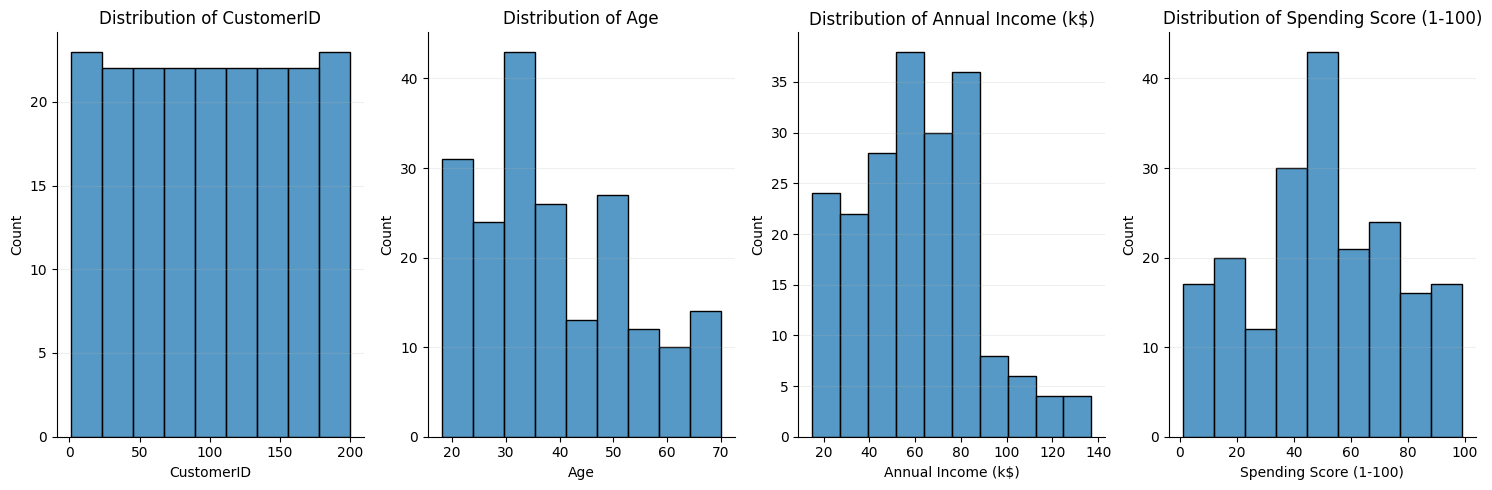

In [70]:
plt.figure(figsize=(15, 5))
for i, col in enumerate(numeric_cols, 1):
    plt.subplot(1, len(numeric_cols), i)
    sns.histplot(data=customer_data, x=col)
    sns.despine(right=True, top=True)
    plt.grid(axis='x', visible=False)
    plt.grid(axis='y', alpha=0.2)
    plt.title(f'Distribution of {col}')
plt.tight_layout()
plt.show()

#### Box plots

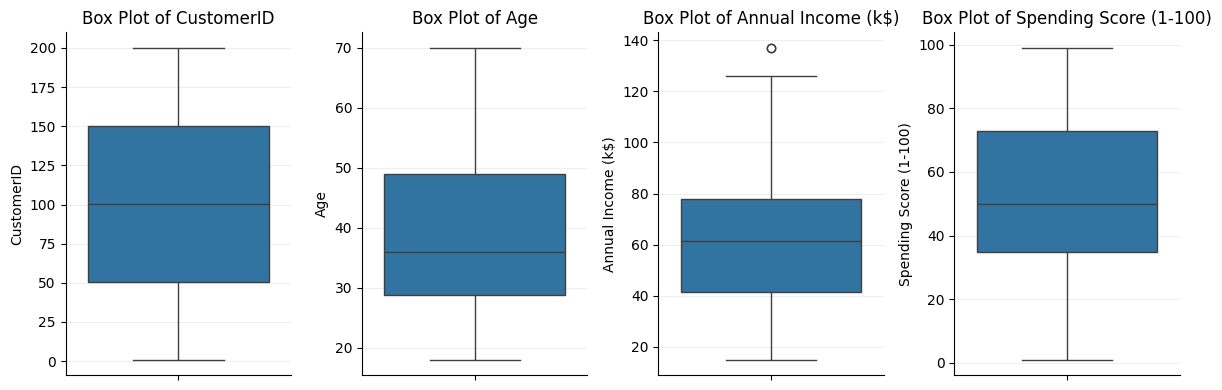

In [71]:
plt.figure(figsize=(12, 4))
for i, col in enumerate(numeric_cols, 1):
    plt.subplot(1, len(numeric_cols), i)
    sns.boxplot(data=customer_data, y=col)
    sns.despine(right=True, top=True)
    plt.grid(axis='x', visible=False)
    plt.grid(axis='y', alpha=0.2)
    plt.title(f'Box Plot of {col}')
plt.tight_layout()
plt.show()

#### Missing data plot

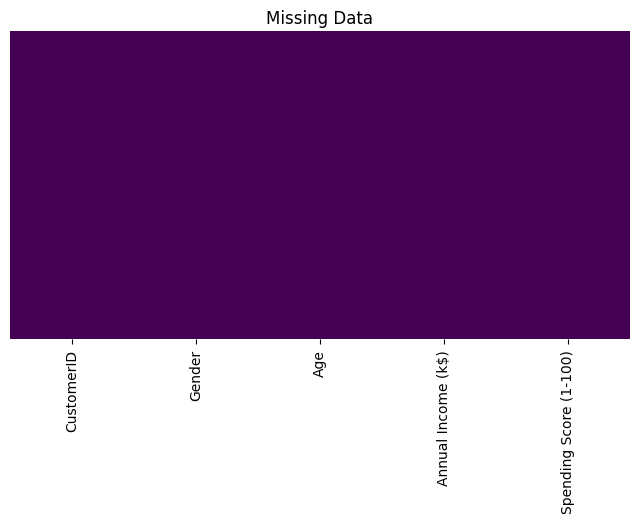

In [72]:
plt.figure(figsize=(8, 4))
sns.heatmap(customer_data.isnull(), yticklabels=False, cbar=False, cmap='viridis')
plt.title('Missing Data')
plt.show()

#### Correlation heatmap

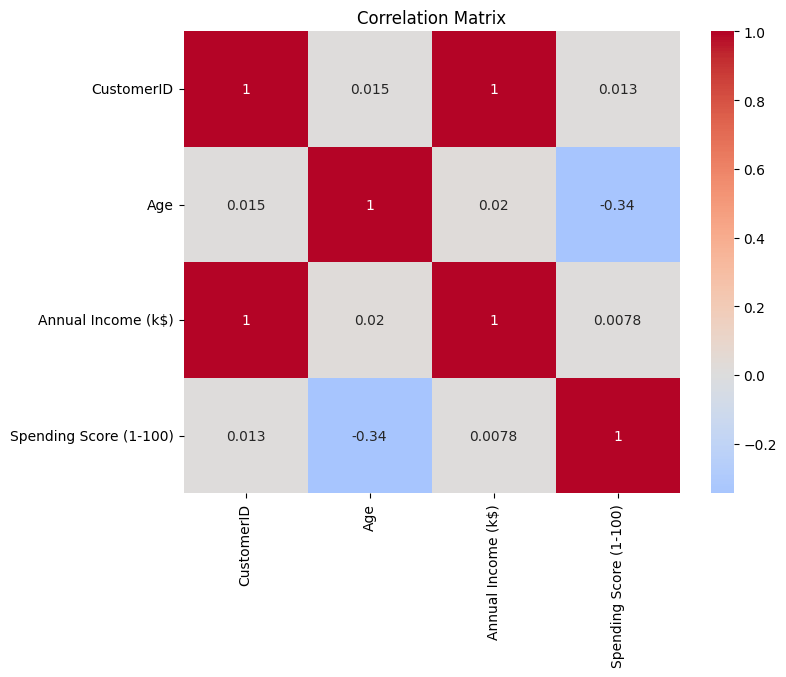

In [73]:
plt.figure(figsize=(8, 6))
sns.heatmap(spearman_corr, annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Matrix')
plt.show()

#### Scatter plot matrix

<Figure size 1000x1000 with 0 Axes>

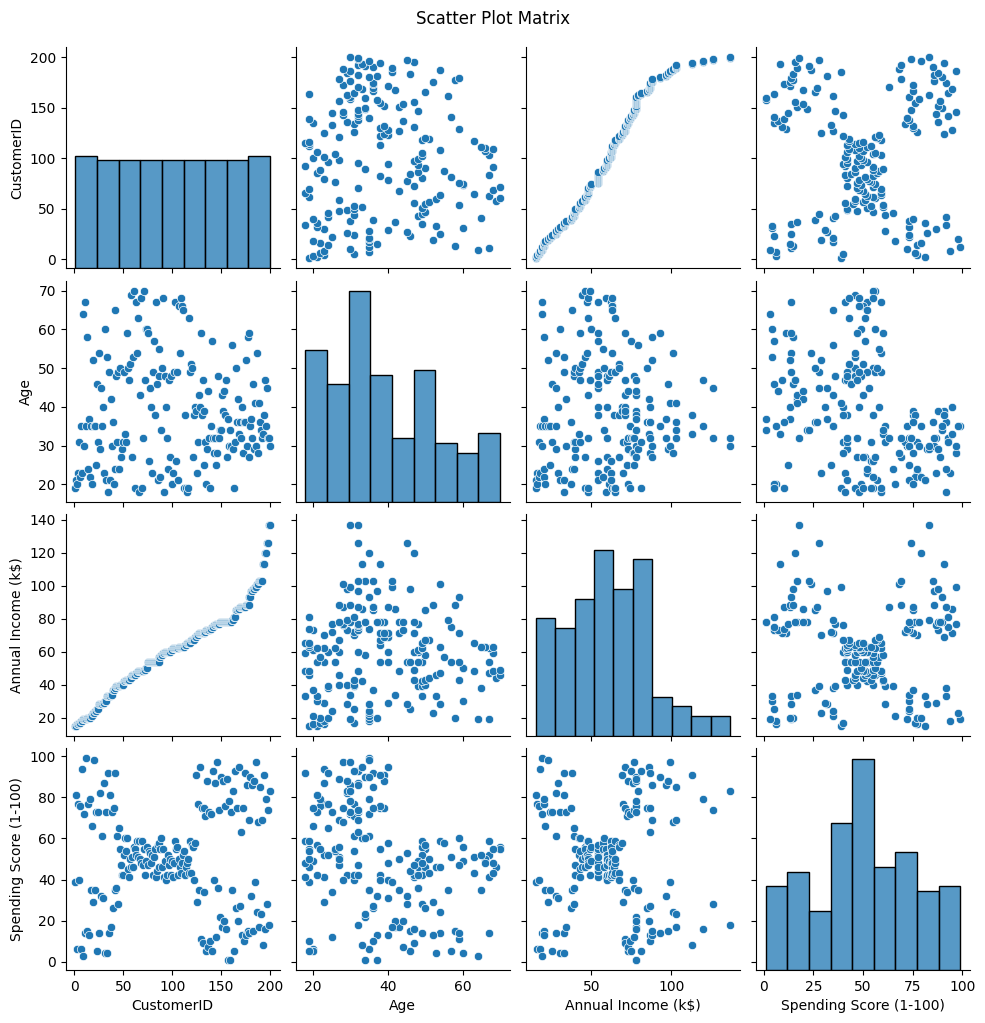

In [74]:
plt.figure(figsize=(10, 10))
sns.pairplot(customer_data[['CustomerID', 'Age', 'Annual Income (k$)', 'Spending Score (1-100)']])
plt.suptitle('Scatter Plot Matrix', y=1.02)
plt.show()

## Step 4: Feature selection for clustering
We will use **Age**, **Annual Income (KES)**, and **Spending Score (1‑100)**.

In [75]:
X = customer_data[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']].copy()
X.head()

,Age,Annual Income (k$),Spending Score (1-100)
0,19,15,39
1,21,15,81
2,20,16,6
3,23,16,77
4,31,17,40


## Step 5: Data preprocessing and transformation

In [76]:
# Option 1: Standardize (mean=0, variance=1)
scaler_standard = StandardScaler()
X_scaled = scaler_standard.fit_transform(X)
print("\nStandardized data (mean=0, variance=1):")

X_scaled_df = pd.DataFrame(X_scaled, columns=X.columns)

# Confirmation
display(pd.DataFrame(X).describe())
display(pd.DataFrame(X_scaled_df).describe())


# Option 2: Normalize (scale between 0 and 1) - this is optional for k-Means
# normalizer = MinMaxScaler()
# X_normalized = normalizer.fit_transform(X)
# print("\nNormalized data (scale between 0 and 1):")
# print(X_normalized)


Standardized data (mean=0, variance=1):


,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000
mean,38.850000,60.560000,50.200000
std,13.969007,26.264721,25.823522
min,18.000000,15.000000,1.000000
25%,28.750000,41.500000,34.750000
50%,36.000000,61.500000,50.000000
75%,49.000000,78.000000,73.000000
max,70.000000,137.000000,99.000000


,Age,Annual Income (k$),Spending Score (1-100)
count,2.000000e+02,2.000000e+02,2.000000e+02
mean,-1.021405e-16,-2.131628e-16,-1.465494e-16
std,1.002509e+00,1.002509e+00,1.002509e+00
min,-1.496335e+00,-1.738999e+00,-1.910021e+00
25%,-7.248436e-01,-7.275093e-01,-5.997931e-01
50%,-2.045351e-01,3.587926e-02,-7.764312e-03
75%,7.284319e-01,6.656748e-01,8.851316e-01
max,2.235532e+00,2.917671e+00,1.894492e+00


## Step 6: Determine the optimal number of clusters using the Elbow method

1. **Inertia Calculation Loop:**
   - Creates an empty list `inertia` to store the sum of squared distances
   - Loops through k values from 1 to 10 using `range(1,11)`
   - For each k value:
     - Creates a KMeans model with k clusters
     - Fits the model to the scaled data
     - Adds the inertia (Within-Cluster Sum of Squares [WCSS]) to the list
          - **Within-Cluster Sum of Squares (WCSS)**, also known as **inertia**, measures the compactness of clusters in a clustering algorithm. It represents the sum of the squared distances between each data point in a cluster and the centroid of that cluster. A lower WCSS indicates that the data points within each cluster are closer to their respective centroid, suggesting tighter, more compact clusters.

2. **Visualization:**
   - Creates a figure of size 6x4
   - Plots k values (x-axis) against inertia values (y-axis)
   - Adds markers 'o' at each point
   - Labels axes and adds title
   - Displays the plot

3. **Purpose:**
   - The Elbow Method helps in finding the optimal number of clusters
   - The "elbow" in the plot indicates where adding more clusters gives diminishing returns
   - Point where the line starts to level out suggests optimal k value

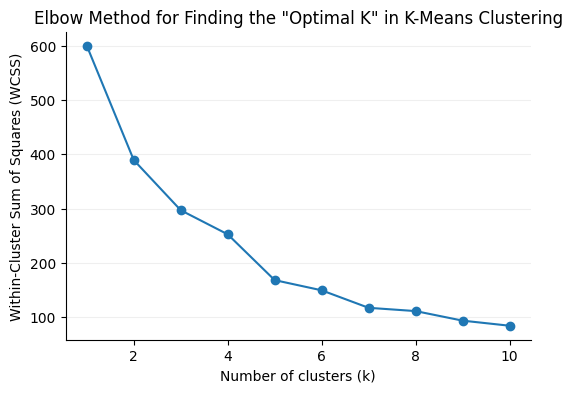

In [77]:
inertia = []
K = range(1, 11)
for k in K:
    km = KMeans(n_clusters=k, random_state=53)
    km.fit(X_scaled)
    inertia.append(km.inertia_)

plt.figure(figsize=(6,4))
plt.plot(K, inertia, marker='o')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Within-Cluster Sum of Squares (WCSS)')
sns.despine(right=True, top=True)
plt.grid(axis='x', visible=False)
plt.grid(axis='y', alpha=0.2)
plt.title('Elbow Method for Finding the \"Optimal K\" in K-Means Clustering')
plt.show()

Based on the elbow plot, **k = 5** gives the ideal number of clusters; where adding more clusters does not significantly improve tightness.

## Step 7: Apply K-Means clustering using the optimal number of clusters

In [78]:
k = 5
kmeans = KMeans(n_clusters=k, random_state=53)
clusters = kmeans.fit_predict(X_scaled)
customer_data['Cluster'] = clusters
customer_data.to_csv('./data/mall_customers_with_clusters.csv')

display(customer_data)

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),Cluster
0,1,Male,19,15,39,4
1,2,Male,21,15,81,4
2,3,Female,20,16,6,3
3,4,Female,23,16,77,4
4,5,Female,31,17,40,4
...,...,...,...,...,...,...
195,196,Female,35,120,79,0
196,197,Female,45,126,28,2
197,198,Male,32,126,74,0
198,199,Male,32,137,18,2


## Step 8: Visualize the clusters

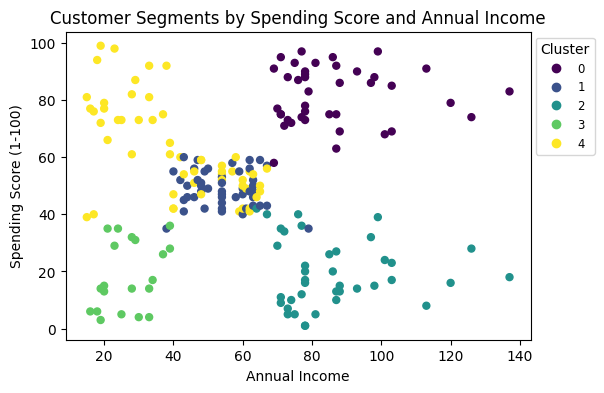

In [79]:
plt.figure(figsize=(6,4))
scatter = plt.scatter(customer_data['Annual Income (k$)'],
                      customer_data['Spending Score (1-100)'],
                      c=customer_data['Cluster'], s=25)
plt.xlabel('Annual Income')
plt.ylabel('Spending Score (1‑100)')
plt.title('Customer Segments by Spending Score and Annual Income')
plt.legend(*scatter.legend_elements(), title='Cluster', loc='upper right',
           bbox_to_anchor=(1.15, 1), fontsize='small')
plt.show()

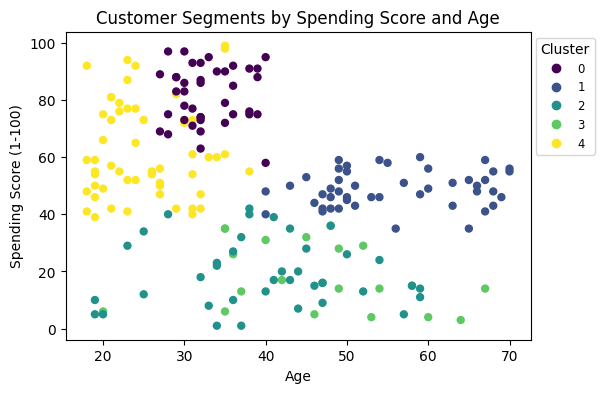

In [80]:
plt.figure(figsize=(6,4))
scatter = plt.scatter(customer_data['Age'],
                      customer_data['Spending Score (1-100)'],
                      c=customer_data['Cluster'], s=25)
plt.xlabel('Age')
plt.ylabel('Spending Score (1‑100)')
plt.title('Customer Segments by Spending Score and Age')
plt.legend(*scatter.legend_elements(), title='Cluster', loc='upper right',
           bbox_to_anchor=(1.15, 1), fontsize='small')
plt.show()

## Step 9: Interpret the clusters (customer segments in the market)

In [81]:
print("\nGender distribution by cluster:")
print(pd.crosstab(customer_data['Cluster'], customer_data['Gender']))
print("\nCluster statistics:")
print("\nMeans:")
display(customer_data.groupby('Cluster').mean(numeric_only=True))
print("\nStandard deviations:")
display(customer_data.groupby('Cluster').std(numeric_only=True))


Gender distribution by cluster:
Gender   Male  Female
Cluster              
0          18      22
1          20      27
2          20      19
3           8      12
4          22      32

Cluster statistics:

Means:


,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
Cluster,,,,
0,161.025000,32.875000,86.100000,81.525000
1,83.872340,55.638298,54.382979,48.851064
2,159.743590,39.871795,86.102564,19.358974
3,24.100000,46.250000,26.750000,18.350000
4,55.648148,25.185185,41.092593,62.240741



Standard deviations:


,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
Cluster,,,,
0,23.338630,3.857643,16.339036,9.999968
1,24.425234,8.913657,8.818344,6.303825
2,24.104725,10.938054,16.725013,11.610991
3,12.336936,11.579815,7.311671,11.935242
4,36.656054,5.508395,16.815613,16.596130


| Cluster | Typical age | Gender | Income level | Spending Behaviour |
|---------|-------------|--------|--------------|--------------------|
| 0       | Young       | Both   | High         | Targeted premium   |
| 1       | Young       | Both   | Low–medium   | Average spenders   |
| 2       | Mature      | Both   | High         | Low spenders       |
| 3       | Mature      | Female | Low          | Frugal             |
| 4       | Middle‑age  | Both   | Medium       | Luxury shoppers    |